# <font color=green>HEART DISEASE ANALYSIS

# 1.Introduction to Data set
       This dataset gives a number of variables along with a target condition of having or not having heart disease.
### Data Dictionary
**Age:** The person's age in years 
<br>**sex:** The person's sex (1 = male, 0 = female) 
<br>**cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) 
<br>**trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital) chol: The person's cholesterol measurement in mg/dl 
<br>**fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
<br>**restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria) 
<br>**thalach:** The person's maximum heart rate achieved 
<br>**exang:** Exercise induced angina (1 = yes; 0 = no) 
<br>**oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here) 
<br>**slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) 
<br>**ca:** The number of major vessels (0-3) 
<br>**thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect) 
<br>**target:** Heart disease (0 = no, 1 = yes)

## 2. Import Necessary Libraries

In [1]:
# Here we load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Using Powerful Pandas Library We can read and Manipulate the data.
data=pd.read_csv("../input/heart.csv")

In [3]:
#Displaying few rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### By seeing its a clean dataset.By using the Data dictionary we can understand the variables. 

Let's read about heart disease real facts
#### <font color=red> Some Major Factors for Heart Disease 
Gender (males are at greater risk)<br>
Age (the older you get, the higher your risk)<br>
Smoking<br>
High LDL, or "bad" cholesterol, and low HDL, or "good" cholesterol<br>
Uncontrolled hypertension (high blood pressure)<br>
Physical inactivity<br>
Obesity<br>
Uncontrolled diabetes<br>
Uncontrolled stress and anger

Let's change the column names for easy understanding and coding

In [4]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']


Using the Data dictionary, we can replace the categorical variables by proper meaningful naming.

In [5]:
#changing the Categorical Variables

data.sex[data.sex==0]='Female'
data.sex[data.sex==1]='Male'


data.chest_pain_type[data.chest_pain_type==0]='typical angina'
data.chest_pain_type[data.chest_pain_type== 1] = 'atypical angina'
data.chest_pain_type[data.chest_pain_type== 2] = 'non-anginal pain'
data.chest_pain_type[data.chest_pain_type== 3] = 'asymptomatic'

data.rest_ecg[data.rest_ecg == 0] = 'normal'
data.rest_ecg[data.rest_ecg == 1] = 'ST-T wave abnormality'
data.rest_ecg[data.rest_ecg == 2] = 'left ventricular hypertrophy'

data.fasting_blood_sugar[data.fasting_blood_sugar == 0] = 'lower than 120mg/ml'
data.fasting_blood_sugar[data.fasting_blood_sugar == 1] = 'greater than 120mg/ml'


data.exercise_induced_angina[data.exercise_induced_angina == 0] = 'no'
data.exercise_induced_angina[data.exercise_induced_angina == 1] = 'yes'


data.st_slope[data.st_slope== 0] = 'upsloping'
data.st_slope[data.st_slope== 1] = 'flat'
data.st_slope[data.st_slope== 2] = 'downsloping'

data.thalassemia[data.thalassemia == 1] = 'normal'
data.thalassemia[data.thalassemia ==  2] = 'fixed defect'
data.thalassemia[data.thalassemia == 3] = 'reversable defect'

Let's take a look

In [6]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,Male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,Male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,Female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,Male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,Female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


Let's check the Missing Values

In [7]:
data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

There is no Missing Values. Let's have a look on Datatypes

In [8]:
data.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

Let's change our target variable into object

In [9]:
data.target=data.target.astype('object')

Let's View Basic EDA analysis

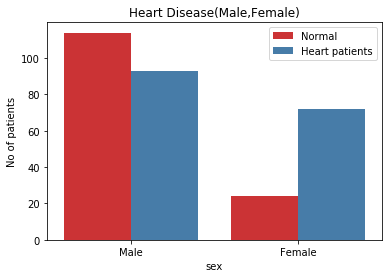

In [10]:
# Target Vs Sex-->Count Plot
sns.countplot(x=data.sex,hue=data.target,palette='Set1')
plt.title("Heart Disease(Male,Female)")
plt.ylabel("No of patients")
plt.legend(['Normal','Heart patients'],loc=1)

By seeing above plot we can say Male genger having more number of Heart Disease.

Text(0.5, 0, 'Chest Pain Type')

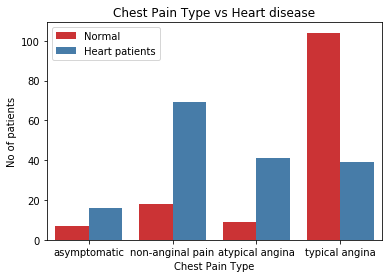

In [11]:
#Target vs chest pain
sns.countplot(x=data.chest_pain_type,hue=data.target,palette='Set1')
plt.ylabel("No of patients")
plt.legend(['Normal','Heart patients'],loc=2)
plt.title("Chest Pain Type vs Heart disease")
plt.xlabel("Chest Pain Type")

From this plot we can cleary say higher number of patients having Non-Anginal Chest Pain

Text(0.5, 0, 'Fasting Blood Sugar')

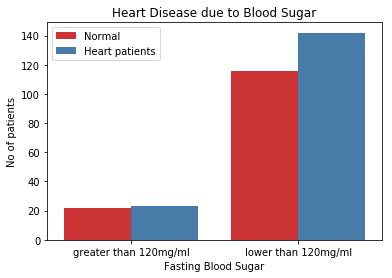

In [12]:
#Target VS Fasting Blood Sugar
sns.countplot(x=data.fasting_blood_sugar,hue=data.target,palette='Set1')
plt.ylabel("No of patients")
plt.legend(['Normal','Heart patients'],loc=2)
plt.title("Heart Disease due to Blood Sugar")
plt.xlabel("Fasting Blood Sugar")

Text(0.5, 0, 'Resting electrocardiographic measurement')

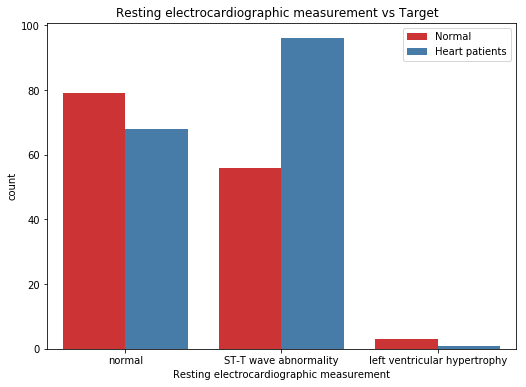

In [13]:
#Target Vs RestECG
plt.figure(figsize=(8.4,6))
sns.countplot(x=data.rest_ecg,hue=data.target,palette='Set1')
plt.legend(['Normal','Heart patients'],loc=1)
plt.title("Resting electrocardiographic measurement vs Target  ")
plt.xlabel("Resting electrocardiographic measurement")


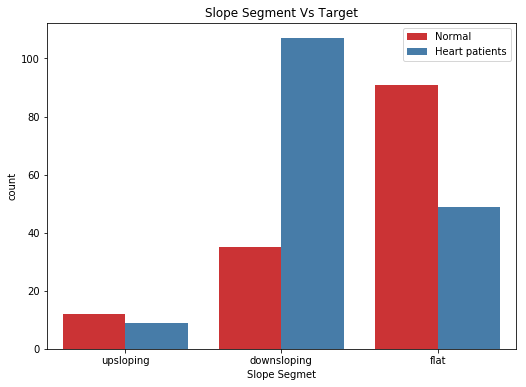

In [14]:
#Target vs Slope Segment
plt.figure(figsize=(8.4,6))
sns.countplot(x=data.st_slope,hue=data.target,palette='Set1')
plt.title("Slope Segment Vs Target")
plt.xlabel("Slope Segmet")
plt.legend(['Normal','Heart patients'],loc=1)


Text(0.5, 0, 'Blood Disorder')

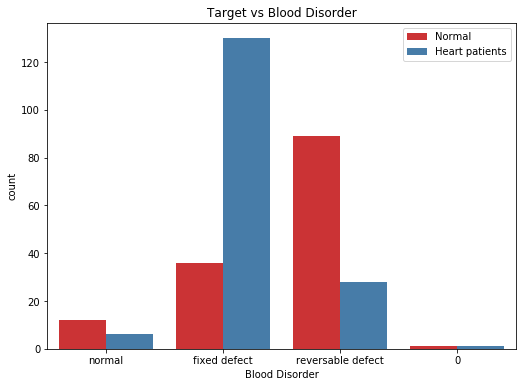

In [15]:
#Target vs Blood disorder
plt.figure(figsize=(8.4,6))
sns.countplot(x=data.thalassemia,hue=data.target,palette='Set1')
plt.legend(['Normal','Heart patients'],loc=1)
plt.title("Target vs Blood Disorder")
plt.xlabel("Blood Disorder")

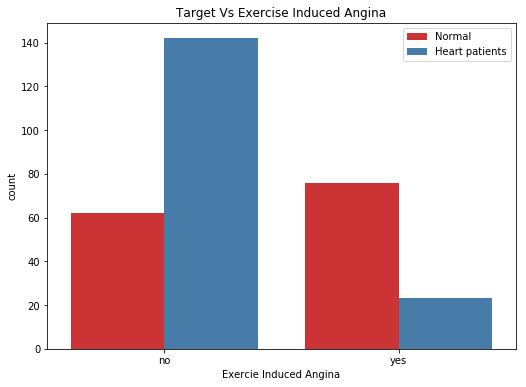

In [16]:
#Target Vs Exercise Induced angina
plt.figure(figsize=(8.4,6))
sns.countplot(x=data.exercise_induced_angina,hue=data.target,palette='Set1')
plt.xlabel("Exercie Induced Angina")
plt.title("Target Vs Exercise Induced Angina")
plt.legend(['Normal','Heart patients'],loc=1)


Text(0.5, 1.0, 'Age VS Target')

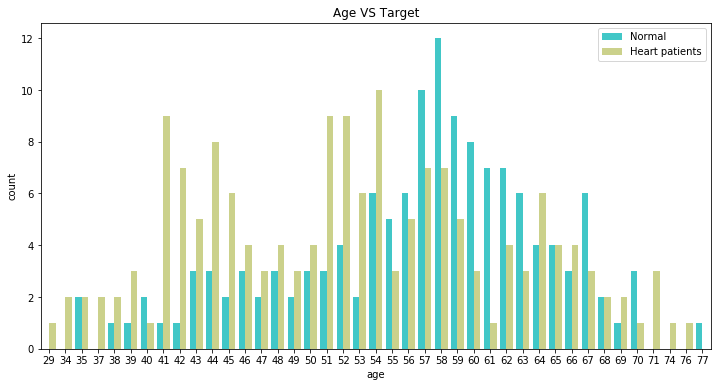

In [17]:
# Target VS age
plt.figure(figsize=(12,6))
sns.countplot(x=data.age,hue=data.target,palette="rainbow")
plt.legend(['Normal','Heart patients'],loc=1)
plt.title("Age VS Target")

Text(0.5, 1.0, 'Age_grp VS Target')

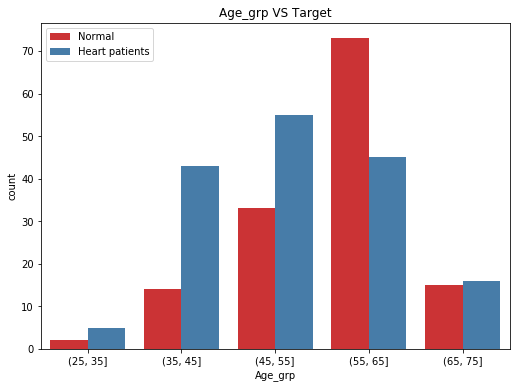

In [18]:
data['Age_grp']=pd.cut(x=data.age,bins=range(25,85,10))#creating Age Grp Columns
plt.figure(figsize=(8.4,6))
sns.countplot(x=data.Age_grp,hue=data.target,palette='Set1')
plt.legend(['Normal','Heart patients'],loc=2)
plt.title("Age_grp VS Target")

By this We can cleary say age is the important factor.

Text(0.5, 1.0, 'Blood pessure Level in heart Patients')

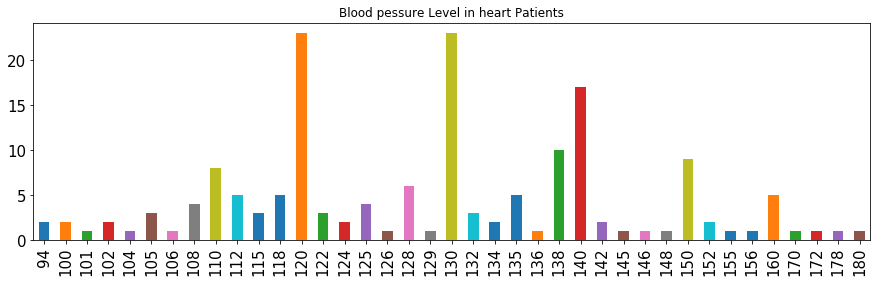

In [19]:
#target Vs Blood pressure
plot = data[data.target == 1].resting_blood_pressure.value_counts().sort_index().plot(kind = "bar", figsize=(15,4), fontsize = 15)
plt.title("Blood pessure Level in heart Patients")

Text(0.5, 1.0, 'Chol level in Different Age Groups')

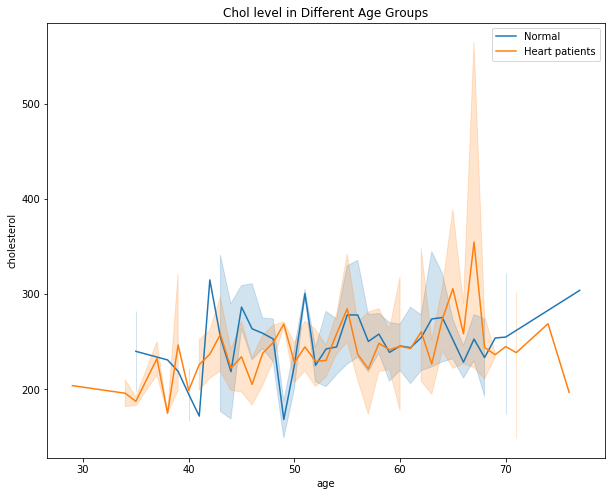

In [20]:
#Age vs Chol level
plt.figure(figsize=(10,8))
sns.lineplot(x=data.age,y=data.cholesterol,hue=data.target)
plt.legend(['Normal','Heart patients'],loc=1)
plt.title("Chol level in Different Age Groups")


Correlation Checking

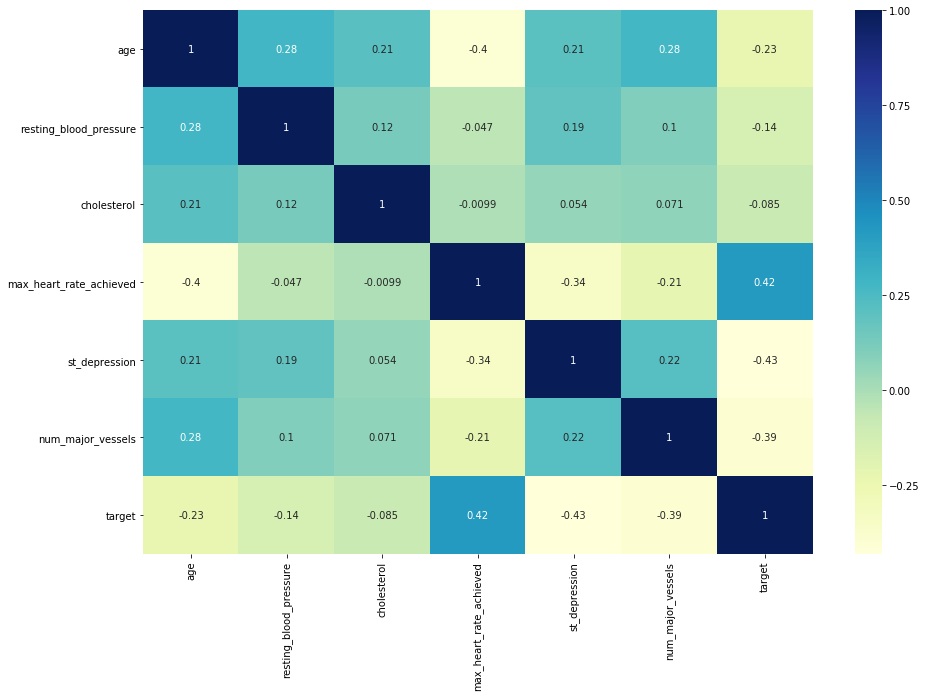

In [21]:
data.target=data.target.astype('int')
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

Dummy Creation

In [22]:
data=pd.get_dummies(data,drop_first=True)

Let's check the dataset

In [23]:

data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_Male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,"Age_grp_(35, 45]","Age_grp_(45, 55]","Age_grp_(55, 65]","Age_grp_(65, 75]"
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0


Correlation checking with Dummies

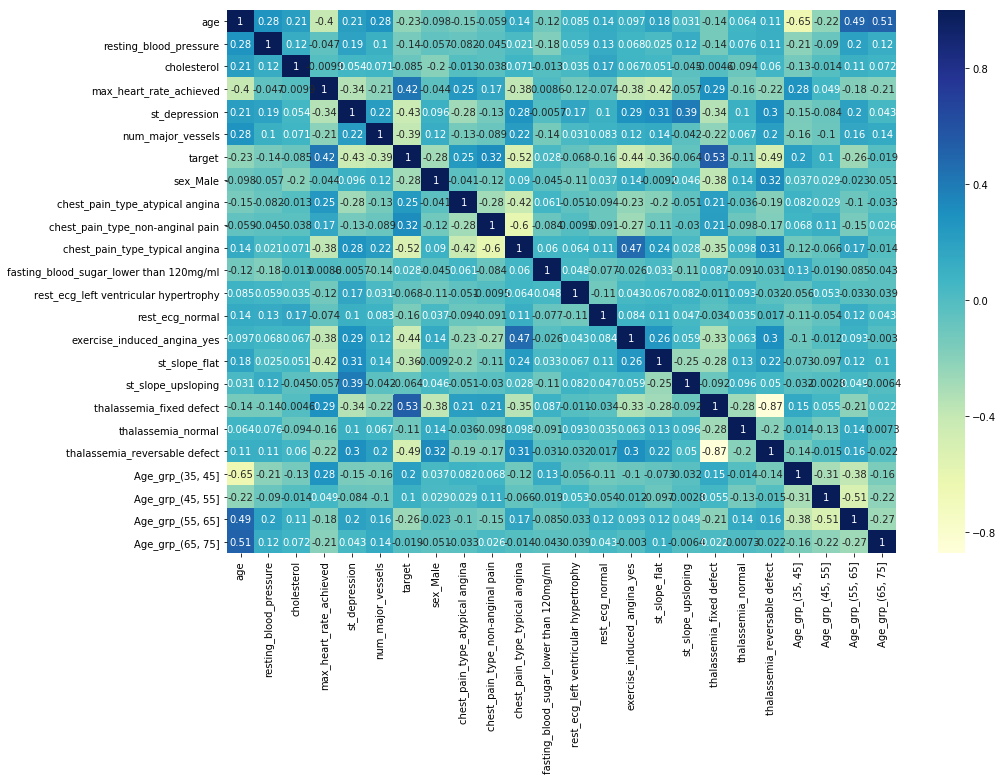

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

# 3.Model Creation 
### Let's We go for the Logistic model creation.We split the data into two parts train(80%) and Test(20%).

In [25]:
x=data.drop('target',axis=1)
y=data['target'].values

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [27]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred=lg.predict(x_test)

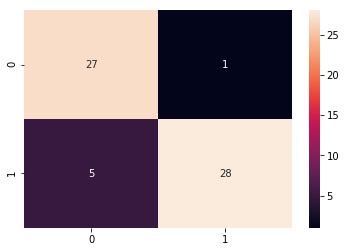

In [28]:
from sklearn.metrics import confusion_matrix,r2_score,accuracy_score
cmat = confusion_matrix(y_pred,y_test)
sns.heatmap(cmat, annot=True)

R2 and Accuaracy score

In [29]:
print('Accurancy:',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",(lg.score(x_train, y_train)))
print("Logistic TEST score with ",(lg.score(x_test, y_test)))

Accurancy: 0.9016393442622951
Logistic TRAIN score with  0.8471074380165289
Logistic TEST score with  0.9016393442622951


# Conclusion
 <font color="Dark Green">We can see in the output, we got 0.9016393442622951 in logistic regression model.our model shows 90% accuracy. I am a beginner to data science. Please comment me your Suggestions to Develop much more. This is my first kernal and my first model as a learner. I hope this can be useful. 